In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec
import glob
import collections
import math
import re
import os
from collections import defaultdict

This notebook is used to plot the shannon calculations obtained from the multispecies_shannon_calculator code.

In [9]:
g_max = 0.083
nRuns = 100

pc_res_vals = [14, 15]
shannon_directory_14pc_24Sep = "shannon_calculations_phase2/14_pc_res-24-Sep-2020/" #path to the directory containing all the processed shannon data csv files
shannon_directory_15pc_24Sep = "shannon_calculations_phase2/15_pc_res-24-Sep-2020/"

In [3]:
def combineShannonDataIntoDict(filepath, pc_res, nRuns):
    '''
    This iterates over all the csv files of the processed shannon data and collates them into a dictionary.
    
    The keys to this dictionary are the runIDs, the values in this dictionary are dataframes of the shannon data over time
    '''
    
    shannon_dict = {}
    
    for runID in range(nRuns):
        
        shannon_dict["runID_"+str(runID)] = pd.read_csv(filepath+"/shannon_calculations-"+str(pc_res)+"_pc_res-runID_"+str(runID)+".csv")
        
    return shannon_dict

In [4]:
def getAveragedShannonVals(shannon_data):
    '''
    this method collates all the shannon data over all the runs and averages them
    '''
    time_df = pd.DataFrame() #time
    nBac_df = pd.DataFrame() #no. of bacteria over time
    H_df = pd.DataFrame() #shannon index over time
    E_df = pd.DataFrame() #shannon equitability over time
    S_df = pd.DataFrame() #no. of species over time
    
    for runID in shannon_data.keys():
        time_df[runID] = shannon_data[runID]["t"]
        nBac_df[runID] = shannon_data[runID]["nBac"]
        H_df[runID] = shannon_data[runID]["H"]
        E_df[runID] = shannon_data[runID]["E"]
        S_df[runID] = shannon_data[runID]["S"]
        
    t_avg = time_df.mean(axis=1)
    nBac_avg = nBac_df.mean(axis=1)
    H_avg = H_df.mean(axis=1)
    E_avg = E_df.mean(axis=1)
    S_avg = S_df.mean(axis=1)
    
    return np.array(t_avg), np.array(nBac_avg), np.array(H_avg), np.array(E_avg), np.array(S_avg)

In [8]:
def plotPhaseComparisons(x_data_list, y_data_list, pc_res_vals, x_label, y_label, title_string, filename):
    plt.figure(figsize=(8,6))
    
    #n
    p1_colour = "#00b359"
    p2_colour = "#b800e6"
    colour_list = [p1_colour, p2_colour]
    
    line_width = 6.
    p4_line_style = "--"
    #skip the first value as it's t=0 so there's only like 1 bacteria in there
    for x_data, y_data, pc_res_val, colour_val in zip(x_data_list, y_data_list, pc_res_vals, colour_list):
        plt.plot(x_data[1:], y_data[1:], label=str(pc_res_val)+"% resistant", lw=line_width, color=colour_val)
    
    
#     if time_bool:
#         plt.plot(x_p2[x_p2 <=100.][1:]*g_max, y_p2[x_p2 <=100.][1:], label="$\\frac{r_{\\rm im}}{Kr_{\\rm det}} > 1$", lw=line_width, color=p2_color)
#         plt.plot(x_p4[x_p4 <=100.][1:]*g_max, y_p4[x_p4 <=100.][1:], label="$\\frac{r_{\\rm im}}{Kr_{\\rm det}} < 1$", lw=line_width, color=p4_color, ls=p4_line_style)

#     else:
#         plt.plot(x_p2[1:], y_p2[1:], label="$\\frac{r_{\\rm im}}{Kr_{\\rm det}} > 1$", lw=line_width, color=p2_color)
#         plt.plot(x_p4[1:], y_p4[1:], label="$\\frac{r_{\\rm im}}{Kr_{\\rm det}} < 1$", lw=line_width, color=p4_color, ls=p4_line_style)
        
        
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.title(title_string, fontsize=20)
    #plt.semilogy()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=16)
    plt.locator_params(axis='x', nbins=4)
    #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #plt.locator_params(axis='y', nbins=6)
    #plt.savefig("species_comp_plots/"+filename, bbox_inches="tight")
    plt.show()

In [5]:
pc_res_14_24Sep_shannon_data = combineShannonDataIntoDict(shannon_directory_14pc_24Sep, pc_res=14, nRuns=nRuns)
pc_res_15_24Sep_shannon_data = combineShannonDataIntoDict(shannon_directory_15pc_24Sep, pc_res=15, nRuns=nRuns)

In [6]:
t_14_pc_res_24Sep, nBac_14_pc_res_24Sep, H_14_pc_res_24Sep, E_14_pc_res_24Sep, S_14_pc_res_24Sep = getAveragedShannonVals(pc_res_14_24Sep_shannon_data)
t_15_pc_res_24Sep, nBac_15_pc_res_24Sep, H_15_pc_res_24Sep, E_15_pc_res_24Sep, S_15_pc_res_24Sep = getAveragedShannonVals(pc_res_15_24Sep_shannon_data)

In [7]:
#list containing all of the shannon calculated data, arranged in order of percentage resistance
t_list = [t_14_pc_res_24Sep, t_15_pc_res_24Sep]
nBac_list = [nBac_14_pc_res_24Sep, nBac_15_pc_res_24Sep]
H_list = [H_14_pc_res_24Sep, H_15_pc_res_24Sep]
E_list = [E_14_pc_res_24Sep, E_15_pc_res_24Sep]
S_list = [S_14_pc_res_24Sep, S_15_pc_res_24Sep]

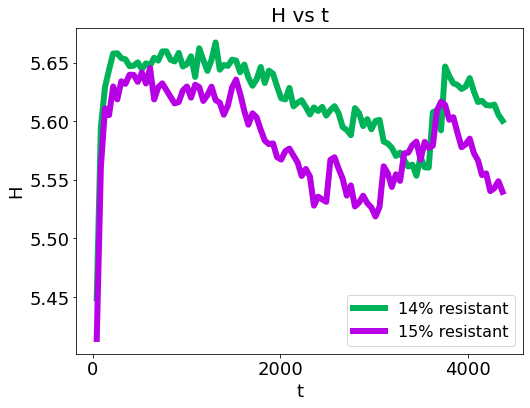

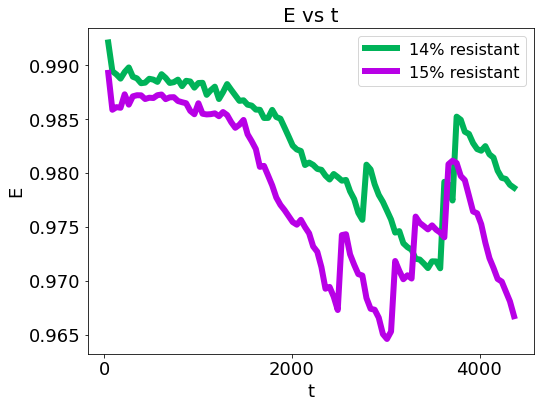

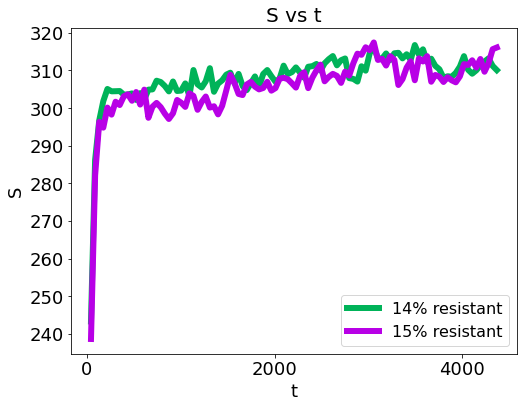

In [13]:
plotPhaseComparisons(t_list, H_list, pc_res_vals, x_label="t", y_label="H", title_string="H vs t", filename="blanko")
plotPhaseComparisons(t_list, E_list, pc_res_vals, x_label="t", y_label="E", title_string="E vs t", filename="blanko")
plotPhaseComparisons(t_list, S_list, pc_res_vals, x_label="t", y_label="S", title_string="S vs t", filename="blanko")
